# **Title of Project**

# Bank Churn Modelling

## **Objective**

1. Data Encoding
2. Feature Scaling
3. Handling Imbalance Data
4. Support Vector Machine Classifier
5. Grid Search for Hyperparameter Tunning

## **Data Source**

https://github.com/YBIFoundation/Dataset/blob/main/Bank%20Churn%20Modelling.csv

## **Import Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [4]:
df = pd.read_csv("Bank Churn Modelling.csv")

## **Describe Data**

In [4]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.duplicated('CustomerId').sum()

0

In [6]:
df=df.set_index('CustomerId')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Encoding

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df.replace({'Geography':{'France':2, 'Germany':1, 'Spain':0}}, inplace=True)

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df.replace({'Gender':{'Male':0, 'Female':1}}, inplace=True)

In [12]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [13]:
df.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1 }}, inplace=True)

In [14]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [15]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [16]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [17]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

# **Data Visualization**

In [156]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

<Axes: >

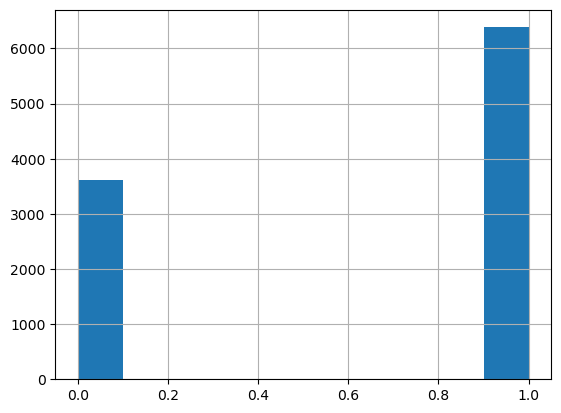

In [18]:
df['Zero Balance'].hist()

## **Define Target Variable (y) and Feature Variables (X)**

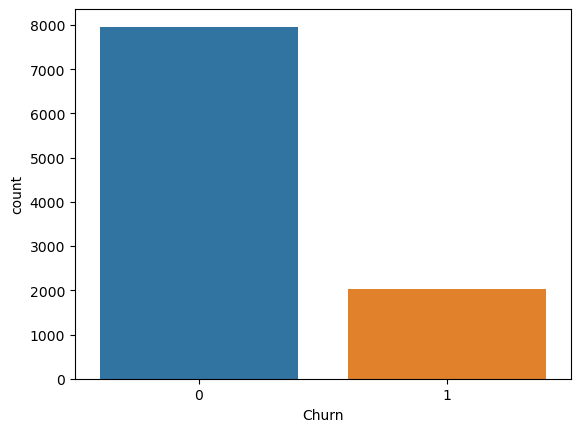

In [29]:
sns.countplot(x = 'Churn', data = df);

In [20]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [21]:
X = df.drop(['Surname', 'Churn'], axis = 1)

In [26]:
y = df['Churn']

In [27]:
X.shape, y.shape

((10000, 11), (10000,))

In [28]:
y

CustomerId
15634602    1
15647311    0
15619304    1
15701354    0
15737888    0
           ..
15606229    0
15569892    0
15584532    1
15682355    1
15628319    0
Name: Churn, Length: 10000, dtype: int64

# Handeling Imbalanced Data
1. Oversampling technique by using replacement on minority class
2. Undersampling technique randomly deleting rows from majority class to match the minority class 

In [3]:
pip install -U imbalanced-learn -q

Note: you may need to restart the kernel to use updated packages.


In [30]:
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [31]:
rus = RandomUnderSampler(random_state=2529)

In [32]:
X_rus, y_rus = rus.fit_resample(X, y)

In [33]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [35]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

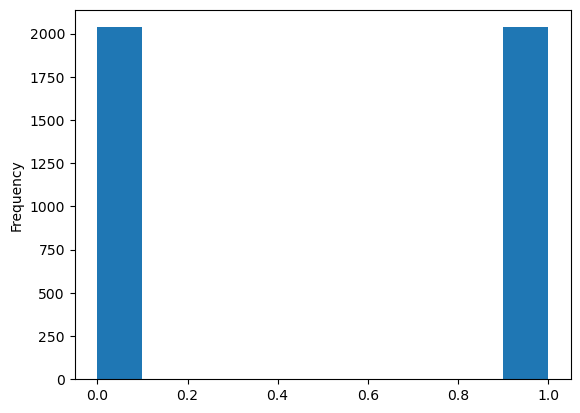

In [36]:
y_rus.plot(kind ='hist')

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
ros = RandomOverSampler(random_state=2529)

In [39]:
X_ros, y_ros = ros.fit_resample(X, y)

In [40]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [41]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

## **Train Test Split**

In [42]:
from sklearn.model_selection import train_test_split

Split Original Data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=2529)

Split Random Under Sample Data

In [45]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus,  test_size=0.3, random_state=2529)

Split Random Over Sample Data

In [46]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros,  test_size=0.3, random_state=2529)

# Standardize Features

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc = StandardScaler()

In [52]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [53]:
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [56]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [55]:
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [235]:
X_train_ros

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
13139,0.587468,0,1,1.108470,-0.675574,-1.325006,1,0,0,-0.210690,0
11842,1.028833,1,0,0.547861,1.371995,0.465209,0,0,1,0.608668,1
9560,0.382182,2,0,-0.012748,0.006949,0.771989,1,1,1,0.109929,1
14762,0.577204,0,1,0.547861,-0.675574,-0.291961,0,0,1,-1.249958,1
3341,0.710640,2,1,-1.133966,-0.675574,-1.325006,0,0,1,0.587948,0
...,...,...,...,...,...,...,...,...,...,...,...
13028,-0.110504,2,1,0.174122,-0.675574,1.048345,0,1,1,0.732123,1
6543,1.696012,1,0,-1.133966,-1.358097,0.822297,1,1,1,0.817755,1
2876,-0.459490,0,1,-0.573357,0.689472,1.071524,0,1,1,-0.743401,1
7730,-0.141297,2,0,0.174122,1.713256,0.663320,1,0,1,1.363989,1


In [57]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [58]:
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

## **Modeling**

In [59]:
from sklearn.svm import  SVC

In [60]:
svc = SVC()

In [61]:
svc.fit(X_train, y_train)

SVC()

In [62]:
y_pred = svc.predict(X_test)

## **Model Evaluation**

In [111]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

In [66]:
confusion_matrix(y_test, y_pred)

array([[2381,   33],
       [ 436,  150]], dtype=int64)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



# Hyperparameter Tunning

In [68]:
from sklearn.model_selection import GridSearchCV
# clf = GridSearchCV(svm.SVC(gamma='auto'), {
#     'C': [1,10,20],
#     'kernel': ['rbf','linear']
# }, cv=5, return_train_score=False)
# clf.fit(iris.data, iris.target)
# clf.cv_results_

In [70]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [71]:
grid  = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [72]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [73]:
grid_predictions = grid.predict(X_test)

In [74]:
confusion_matrix(y_test,grid_predictions)

array([[2159,  255],
       [ 343,  243]], dtype=int64)

In [75]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



# Modelling with Random Under Sample

In [76]:
svc_rus = SVC()

In [77]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [78]:
y_pred_rus = svc_rus.predict(X_test_rus)

# Model Evaluation

In [79]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[470, 157],
       [174, 422]], dtype=int64)

In [80]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [89]:
grid_rus  = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_rus.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [90]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [91]:
grid_rus_predictions = grid_rus.predict(X_test_rus)

In [93]:
confusion_matrix(y_test_rus,grid_rus_predictions)

array([[476, 151],
       [172, 424]], dtype=int64)

In [94]:
print(classification_report(y_test_rus, grid_rus_predictions))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



# Modelling with Random Over Sample

In [116]:
svc_ros = SVC()

In [196]:
svc_ros.fit(X_train_ros.values, y_train_ros)

SVC()

In [195]:
X_train_ros.values

array([[ 0.58746813,  0.        ,  1.        , ...,  0.        ,
        -0.21068987,  0.        ],
       [ 1.02883298,  1.        ,  0.        , ...,  1.        ,
         0.60866768,  1.        ],
       [ 0.38218216,  2.        ,  0.        , ...,  1.        ,
         0.109929  ,  1.        ],
       ...,
       [-0.45949034,  0.        ,  1.        , ...,  1.        ,
        -0.74340071,  1.        ],
       [-0.14129708,  2.        ,  0.        , ...,  1.        ,
         1.36398906,  1.        ],
       [-0.85979799,  1.        ,  1.        , ...,  1.        ,
         0.61249246,  1.        ]])

In [198]:
y_pred_ros = svc_ros.predict(X_test_ros.values)

In [199]:
y_pred_ros[9]

1

# Model Evaluation

In [200]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1823,  556],
       [ 626, 1773]], dtype=int64)

In [201]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



# Tunning

In [208]:
grid_ros  = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_ros.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [122]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [124]:
grid_ros_predictions = grid_ros.predict(X_test_ros)

In [192]:
grid_ros_predictions[9]

1

In [125]:
print(classification_report(y_test_ros, grid_ros_predictions))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



In [126]:
final_data = pd.DataFrame({'Models':['Original data','Random Under Sample Data', 'Random Over Sample Data'],'ACC':[accuracy_score(y_test, grid_predictions),
                                                                                                                   accuracy_score(y_test_rus, grid_rus_predictions),
                                                                                                                accuracy_score(y_test_ros, grid_ros_predictions)]})

In [127]:
final_data

,Models,ACC
0,Original data,0.800667
1,Random Under Sample Data,0.735895
2,Random Over Sample Data,0.916283


<Axes: xlabel='Models', ylabel='ACC'>

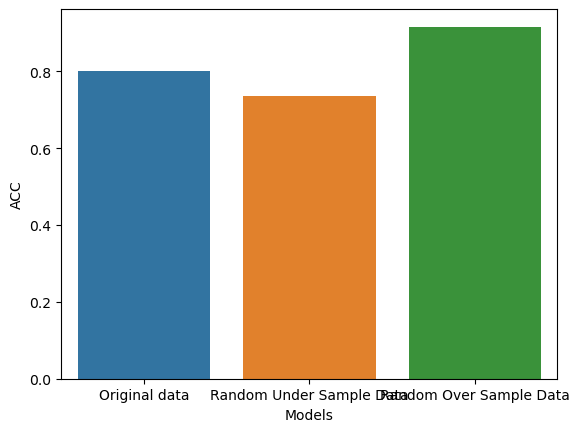

In [128]:
sns.barplot(data=final_data, x='Models', y='ACC')

In [129]:
final_data2 = pd.DataFrame({'Models':['Original data','Random Under Sample Data', 'Random Over Sample Data'],'PRE':[precision_score(y_test, grid_predictions),
                                                                                       precision_score(y_test_rus, grid_rus_predictions),
                                                                                        precision_score(y_test_ros, grid_ros_predictions)]})

In [130]:
final_data2

,Models,PRE
0,Original data,0.487952
1,Random Under Sample Data,0.737391
2,Random Over Sample Data,0.875329


<Axes: xlabel='Models', ylabel='PRE'>

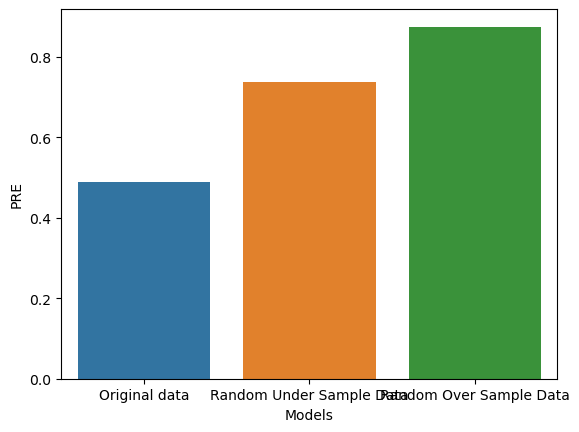

In [131]:
sns.barplot(data=final_data2, x='Models', y='PRE')

In [132]:
final_data3 = pd.DataFrame({'Models':['Original data','Random Under Sample Data', 'Random Over Sample Data'],'RE':[recall_score(y_test, grid_predictions),
                                                                                       recall_score(y_test_rus, grid_rus_predictions),
                                                                                         recall_score(y_test_ros, grid_ros_predictions)                         ]})

In [133]:
final_data3

,Models,RE
0,Original data,0.414676
1,Random Under Sample Data,0.711409
2,Random Over Sample Data,0.971655


# Save The Model

In [135]:
import joblib

In [226]:
joblib.dump(svc_ros, 'Churn_predict')

['Churn_predict']

In [227]:
model=joblib.load('Churn_predict')

In [228]:
df[:10]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
CustomerId,,,,,,,,,,,,,
15634602,Hargrave,619,2,1,42,2,0.00,0,1,1,101348.88,1,0
15647311,Hill,608,0,1,41,1,83807.86,0,0,1,112542.58,0,1
15619304,Onio,502,2,1,42,8,159660.80,1,1,0,113931.57,1,1
15701354,Boni,699,2,1,39,1,0.00,1,0,0,93826.63,0,0
15737888,Mitchell,850,0,1,43,2,125510.82,0,1,1,79084.10,0,1
15574012,Chu,645,0,0,44,8,113755.78,1,1,0,149756.71,1,1
15592531,Bartlett,822,2,0,50,7,0.00,1,1,1,10062.80,0,0
15656148,Obinna,376,1,1,29,4,115046.74,1,1,0,119346.88,1,1
15792365,He,501,2,0,44,4,142051.07,1,0,1,74940.50,0,1


In [229]:
model.predict([[376,1,1,29,4,115046.74,1,1,0,119346.88,1]])

array([0], dtype=int64)

## **Prediction**

In [142]:
from tkinter import *
from sklearn.preprocessing import StandardScaler

In [237]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    if p3 == 1:
        Geography=1
        Geography=0
        Geography=0
    elif p3 == 0:
        Geography=0
        Geography=1
        Geography=0
    elif p3 == 2:
        Geography=0
        Geography=0
        Geography=1 
    p4=float(e4.get())
    p5=int(e5.get())
    p6=float(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    model = joblib.load('churn_predict')
    result=model.predict([[p1,p2,Geography,p4,p5,p6,p7,p8,p9,p10,p11]])
    
    if result == 0:
        Label(master, text="No Exit").grid(row=31)
    else:
        Label(master, text="Exit").grid(row=31)
    
    
master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning")


label = Label(master, text = "Customers Churn Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)



Label(master, text="CreditScore").grid(row=1)
Label(master, text="Geography").grid(row=2)
Label(master, text="Gender").grid(row=3)
Label(master, text="Age").grid(row=4)
Label(master, text="Tenure").grid(row=5)
Label(master, text="Balance").grid(row=6)
Label(master, text="Num Of Products").grid(row=7)
Label(master, text="Has Credit Card").grid(row=8)
Label(master,text="Is Active Member").grid(row=9)
Label(master,text="Estimated Salary").grid(row=10)
Label(master,text="Zero Balance").grid(row=11)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()